# Instalando as bibliotecas necessarias


In [476]:
import requests as rq
import pathlib as path
import pandas as pd
import json
import shutil
import urllib.request
import os
import zipfile
import time
from IPython.display import Image
from IPython.display import clear_output
import io

%matplotlib inline

#url_api = "https://localhost:44346/v1/Demo/"
url_api = "https://localhost:5001/v1/Demo/"

# DOWNLOAD DAS PARTIDAS

Será feito o download de mais de 450 demos e armazenadas em um json para maior facilidade de manuseio

In [7]:
ligas = pd.read_csv("./ligas_gc_2021.csv", sep=',')
index = 1;
start = time.time()

print("Baixando todas partidas demo...")

for link in ligas['demo']:
    filedata = urllib.request.urlopen(link)
    data = filedata.read()
    start = time.time()
    mypath = "partidas"
    
    if not os.path.exists(mypath):
        os.makedirs(mypath, 0o0755)
        print("Pasta criada.")
    
    fileName = mypath + "/" + "partida" + str(index) + ".rar"
    
    with open(fileName, 'wb') as f:
        f.write(data)
        
    with zipfile.ZipFile(fileName) as zip_ref:
        zip_ref.extractall('partidas')
        
    os.remove(fileName)
    
    end = time.time()
    tempoDecorrido = end - start
    print(str(fileName) + " baixada em " + str(tempoDecorrido) + "s")
    
    index+=1;
    

end = time.time()
tempoDecorrido = end - start
print("Todas as partidas baixadas em " + str(tempoDecorrido) + "s")

Baixando todas partidas demo...
partidas/partida1.rar baixada em 1.4404029846191406s
partidas/partida2.rar baixada em 1.4497182369232178s
partidas/partida3.rar baixada em 1.0193402767181396s
partidas/partida4.rar baixada em 3.5093271732330322s
partidas/partida5.rar baixada em 3.4983932971954346s
Todas as partidas baixadas em 3.499394178390503s


In [216]:
def GetNamesWeapon(data):
    result = ['Name', 'TeamName', 'Killed', 'Death', 'Clutches', 'FirstKills', 'FirstDeaths', 'FlashedEnemies', 'WalkQuantityAsTR',
              'DistanceTraveledAsTR', 'DistanceTraveledAsCT']
    for player in data: 
        for weapon in player['Weapons']:
            if weapon['NameWeapon'] not in result:
                result.append(weapon['NameWeapon'])
    return result
                  
def GetInfoWeaponPlayer(name, weapons, jsonResult):
    print()
    dic = {weapon['NameWeapon']: int(weapon['KillQuantity']) for weapon in weapons }
    dic['Name']                 = name
    dic['TeamName']             = jsonResult['TeamName']
    dic['Killed']               = jsonResult['Killed']
    dic['Death']                = jsonResult['Death']
    dic['Clutches']             = jsonResult['Clutches']
    dic['FirstKills']           = jsonResult['FirstKills']
    dic['FirstDeaths']          = jsonResult['FirstDeaths']
    dic['FlashedEnemies']       = jsonResult['FlashedEnemies']
    dic['WalkQuantityAsTR']     = jsonResult['WalkQuantityAsTR']
    dic['DistanceTraveledAsTR'] = jsonResult['DistanceTraveledAsTR']
    dic['DistanceTraveledAsCT'] = jsonResult['DistanceTraveledAsCT']
    return dic

## Agora vamos consumir a API e seus métodos

### Metodo GetPlayers, retorna todos os dados dos jogadores das demos baixadas acima

In [219]:
jsonResult = json.loads(rq.get(url_api + "GetPlayers", verify=False).content)

playerWeaponsArray = []

#pego o nome de todas as armas para fazer de colunas
weaponsArray = GetNamesWeapon(jsonResult)
for player in jsonResult:
    playerWeaponsArray.append(GetInfoWeaponPlayer(player['Name'], player['Weapons'], player))

df = pd.DataFrame(data=playerWeaponsArray, columns=weaponsArray)
df = df.fillna(0)
df.to_csv("AllPlayersStats.csv")
df

C:\Users\muril\anaconda3\lib\site-packages\urllib3\connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


,Name,Killed,Death,Clutches,FirstKills,FirstDeaths,FlashedEnemies,WalkQuantityAsTR,DistanceTraveledAsTR,DistanceTraveledAsCT,...,P2000,Mac10,Tec9,FiveSeven,P250,Desconhecido,UMP,SG556,DualBarettas,P90
0,★ ⑳ xns,21,23,0,5,5,25,15359,168027.44,137196.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,★ ⑳ BobZ,23,20,0,2,1,66,10053,169352.38,125630.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,★ ⑳ ke1z,23,17,1,4,2,45,8618,166938.95,133572.40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,★ ⑳ voltera,19,24,0,5,4,30,12393,168570.29,121506.56,...,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,★ ⑳ MaLLby,19,18,1,2,0,70,12394,161890.48,131345.78,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,★ ⑳ fbz,25,19,1,2,2,33,9835,141198.64,157253.42,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,★ ⑳ TimothyoDaZl,14,23,0,1,3,64,9225,132999.00,158077.46,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,★ ⑳ ftx,20,18,0,1,2,26,10259,129407.59,150114.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,★ ⑳ Lehmann,18,21,0,3,4,20,10253,135227.09,154641.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,★ ⑳ insani,20,19,0,4,6,35,8887,126653.46,169416.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filtrando dados

In [427]:
roles = pd.read_csv("PlayersRoles.csv")
roles

,Id,Name,TeamName,Role
0,16,★ ⑳ FURQE,9z Academy,AWPer
1,33,★ ⑳ loky,Ciam Gaming,AWPer
2,3815,★ ㉑ nqz,DETONA,AWPer
3,3966,★ ㉑ nqz,DETONA,AWPer
4,4325,★ ㉑ nqz,DETONA,AWPer
...,...,...,...,...
161,2342,★ ⑳ Rickbraz -ttJ-,Wolsung (SEM ORG),Suporte
162,2383,★ ⑳ Rickbraz -ttJ-,Wolsung (SEM ORG),Suporte
163,2462,★ ⑳ Rickbraz -ttJ-,Wolsung (SEM ORG),Suporte
164,3670,★ ⑳ Rickbraz -ttJ-,Wolsung (SEM ORG),Suporte


In [538]:
players = pd.read_csv("AllPlayersStats.csv")
players.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
players.insert(1, 'Role', "")

cols = players.columns.tolist()
playersRolesDF = pd.DataFrame(columns=cols)

In [539]:
for index, row in roles.iterrows():
    player = players.loc[players['Name'] == row['Name']]
    if (row['Role'] != 'IGL'):
        player['Role'] = row['Role']
        playersRolesDF = pd.concat([playersRolesDF, player])

<ipython-input-539-976b3805366d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player['Role'] = row['Role']


In [540]:
#playersRolesDF.drop(['ID', 'Name', 'TeamName', 'DistanceTraveledAsCT', 'Knife', 'P250', 'Desconhecido', 'DualBarettas', 'Swag7', 'Zeus', 'P90', 'XM1014', 'MP7', 'MP5SD', 'Nova', 'M249', 'World', 'Scar20', 'Negev', 'Bizon', 'SawedOff', 'G3SG1', 'P2000'], axis=1, inplace=True)
playersRolesDF.drop(['ID', 'Name', 'TeamName', 'DistanceTraveledAsCT', 'Knife'], axis=1, inplace=True)
#playersRolesDF.drop(['ID', 'Name', 'TeamName'], axis=1, inplace=True)
playersRolesDF.Role.unique()

array(['AWPer', 'Entry Fragger', 'Lurker', 'Suporte'], dtype=object)

## Regressão Logística

In [545]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [529]:
X_train, X_test, y_train, y_test = train_test_split(playersRolesDF.drop('Role', axis=1), playersRolesDF['Role'])

In [530]:
logmodel = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=100000)

In [531]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000, solver='liblinear')

               precision    recall  f1-score   support

        AWPer       0.62      0.89      0.73        45
Entry Fragger       0.60      0.68      0.64        56
       Lurker       0.44      0.12      0.20        32
      Suporte       0.31      0.28      0.30        32

     accuracy                           0.55       165
    macro avg       0.50      0.49      0.47       165
 weighted avg       0.52      0.55      0.51       165

AxesSubplot(0.125,0.125;0.62x0.755)


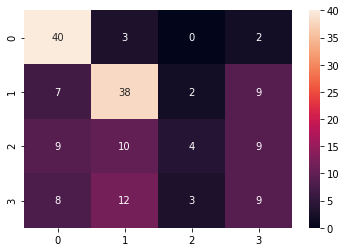

In [543]:
X_train, X_test, y_train, y_test = train_test_split(playersRolesDF.drop('Role', axis=1), playersRolesDF['Role'])
logmodel = LogisticRegression(multi_class='multinomial', max_iter=100000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print(sns.heatmap(confusion_matrix(y_test, predictions), annot=True))

### Mesmo processo acima mas só que repetindo várias vezes

               precision    recall  f1-score   support

        AWPer       0.69      0.86      0.76        43
Entry Fragger       0.47      0.67      0.55        51
       Lurker       0.38      0.17      0.24        35
      Suporte       0.41      0.25      0.31        36

     accuracy                           0.52       165
    macro avg       0.48      0.49      0.46       165
 weighted avg       0.49      0.52      0.49       165



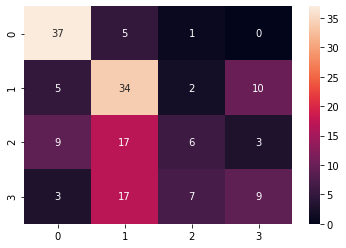

KeyboardInterrupt: 

In [548]:
while (True):
    X_train, X_test, y_train, y_test = train_test_split(playersRolesDF.drop('Role', axis=1), playersRolesDF['Role'])
    logmodel = LogisticRegression(multi_class='multinomial', max_iter=100000)
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)
    print(classification_report(y_test, predictions))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
    plt.show()
    time.sleep(5)
    clear_output(wait=True)

### Metodo GetHeatMap, retorna um mapa de calor da dust2 onde é possível ver onde os jogadores tiveram uma interação e onde eles foram mortos

C:\Users\muril\anaconda3\lib\site-packages\urllib3\connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


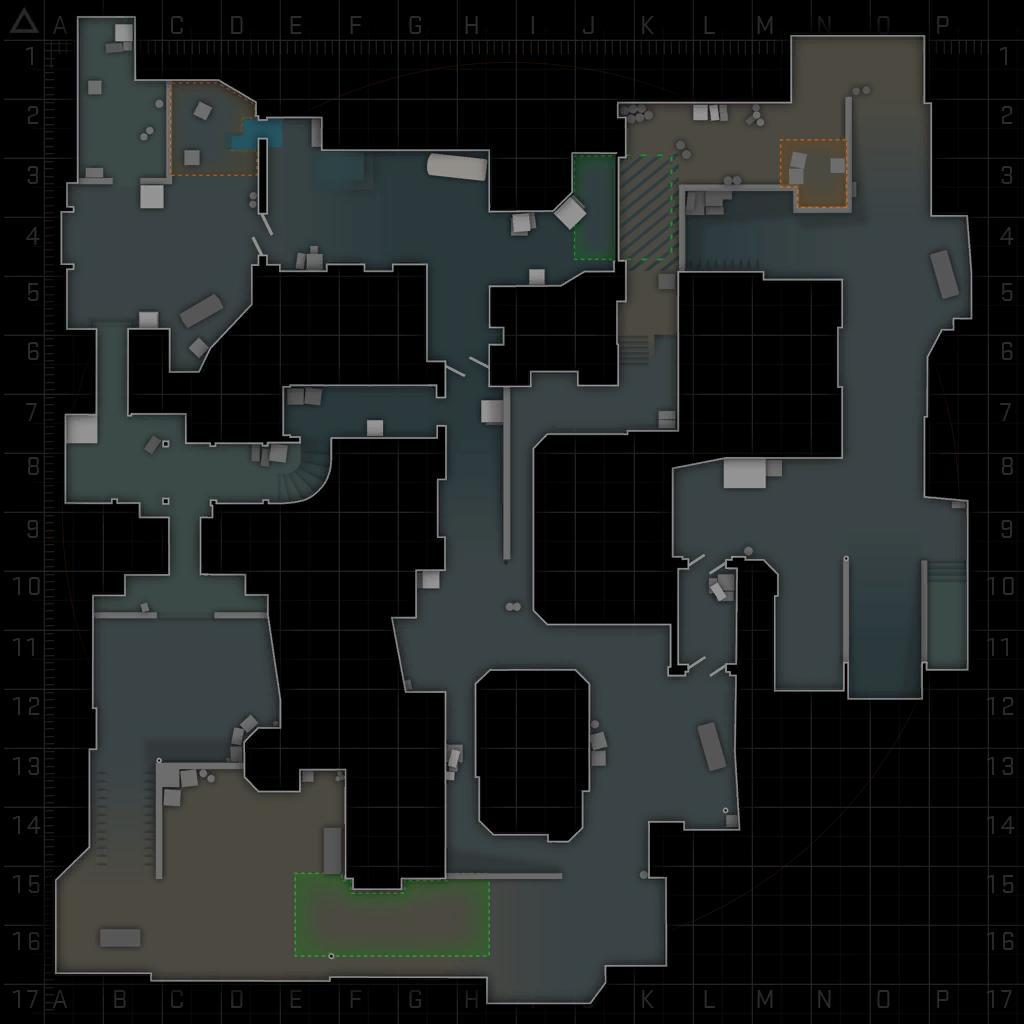

In [14]:
response = rq.get(url_api + "GetHeatMap", verify=False, stream=True)

with open('heat_map.png', 'wb') as image:
    shutil.copyfileobj(response.raw, image)
del response

Image(filename='heat_map.png')